In [1]:
import numpy as np
import pandas as pd

from datetime import datetime as dt
import geopandas as gpd # GeoPandas library for spatial analytics
from shapely.geometry import shape
from shapely.geometry import shape
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use('ggplot')

In [2]:
data = pd.read_csv('../output/film permit_city_seg.csv', parse_dates=['StartDateTime', 'EndDateTime'])

In [3]:
data = data.drop_duplicates(subset=['EventID'])
del data['segids']
del data['SegmentID']

In [4]:
data

,Unnamed: 0,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s),OFT_Text
0,0,628327,Shooting Permit,2022-03-08 07:00:00,2022-03-08 19:00:00,02/28/2022 11:13:50 AM,"Mayor's Office of Film, Theatre & Broadcasting",SUTTON STREET between NORMAN AVENUE and NASSAU...,Brooklyn,1,94,Television,Pilot,United States of America,11222,['SUTTON STREET between NORMAN AVENUE and NASS...
1,1,629351,Shooting Permit,2022-03-08 07:00:00,2022-03-08 22:00:00,03/03/2022 02:51:17 PM,"Mayor's Office of Film, Theatre & Broadcasting",COVERT ST between WYCKOFF AVENUE and IRVING AV...,Queens,5,104,Television,Episodic series,United States of America,"11237, 11385",['COVERT ST between WYCKOFF AVENUE and IRVING ...
2,2,629319,Shooting Permit,2022-03-08 07:00:00,2022-03-08 21:00:00,03/03/2022 01:49:15 PM,"Mayor's Office of Film, Theatre & Broadcasting",WHITE STREET between SEIGEL STREET and MOORE S...,Brooklyn,1,90,Television,Cable-episodic,United States of America,11206,['WHITE STREET between SEIGEL STREET and MOORE...
6,6,629309,Shooting Permit,2022-03-08 07:00:00,2022-03-08 20:00:00,03/03/2022 01:30:28 PM,"Mayor's Office of Film, Theatre & Broadcasting",BARCLAY STREET between BROADWAY and CHURCH STR...,Manhattan,1,1,Television,Episodic series,United States of America,"10007, 10013, 10282",['BARCLAY STREET between BROADWAY and CHURCH S...
18,18,629504,Shooting Permit,2022-03-08 16:00:00,2022-03-09 06:00:00,03/04/2022 08:44:43 AM,"Mayor's Office of Film, Theatre & Broadcasting",WEST 13 STREET between 10 AVENUE and WASHING...,Manhattan,2,6,Film,Feature,United States of America,10014,['WEST 13 STREET between 10 AVENUE and WASHI...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37503,37503,628492,Shooting Permit,2022-03-02 06:30:00,2022-03-02 20:00:00,02/28/2022 04:05:55 PM,"Mayor's Office of Film, Theatre & Broadcasting",WEBSTER AVENUE between EAST 235 STREET and EA...,Bronx,12,47,Television,Episodic series,United States of America,10470,['WEBSTER AVENUE between EAST 235 STREET and ...
37507,37507,624471,Shooting Permit,2022-02-14 06:00:00,2022-02-14 22:00:00,02/04/2022 11:11:04 AM,"Mayor's Office of Film, Theatre & Broadcasting",PROVOST STREET between PAIDGE AVENUE and HURON...,Brooklyn,1,94,Television,Cable-episodic,United States of America,11222,['PROVOST STREET between PAIDGE AVENUE and HUR...
37513,37513,629373,Theater Load in and Load Outs,2022-03-05 00:01:00,2022-03-06 06:00:00,03/03/2022 03:25:49 PM,"Mayor's Office of Film, Theatre & Broadcasting",EAST 11 STREET between 3 AVENUE and 4 AVENUE...,Manhattan,"11, 3","23, 9",Theater,Theater,United States of America,"10003, 10029",['EAST 11 STREET between 3 AVENUE and 4 AVEN...
37515,37515,625976,Shooting Permit,2022-02-24 06:00:00,2022-02-24 22:30:00,02/14/2022 12:06:16 PM,"Mayor's Office of Film, Theatre & Broadcasting",HICKS STREET between HUNTINGTON STREET and WES...,Brooklyn,6,76,WEB,Not Applicable,United States of America,11231,['HICKS STREET between HUNTINGTON STREET and W...


In [5]:
print( data['StartDateTime'].min(), data['StartDateTime'].max() )

2021-01-04 00:01:00 2022-03-08 16:00:00


In [6]:
def range_to_list(a, b):
    return pd.date_range(a, b, freq = 'H')[:-1]

In [7]:
data['StartEnd'] = [[i, j] for i, j in zip( data['StartDateTime'], data['EndDateTime'])]
data['TimeList'] = data['StartEnd'].apply(lambda x: range_to_list(x[0], x[1]))

In [8]:
data['StartEnd'][0]

[Timestamp('2022-03-08 07:00:00'), Timestamp('2022-03-08 19:00:00')]

In [9]:
data['TimeList'].to_list()

[DatetimeIndex(['2022-03-08 07:00:00', '2022-03-08 08:00:00',
                '2022-03-08 09:00:00', '2022-03-08 10:00:00',
                '2022-03-08 11:00:00', '2022-03-08 12:00:00',
                '2022-03-08 13:00:00', '2022-03-08 14:00:00',
                '2022-03-08 15:00:00', '2022-03-08 16:00:00',
                '2022-03-08 17:00:00', '2022-03-08 18:00:00'],
               dtype='datetime64[ns]', freq='H'),
 DatetimeIndex(['2022-03-08 07:00:00', '2022-03-08 08:00:00',
                '2022-03-08 09:00:00', '2022-03-08 10:00:00',
                '2022-03-08 11:00:00', '2022-03-08 12:00:00',
                '2022-03-08 13:00:00', '2022-03-08 14:00:00',
                '2022-03-08 15:00:00', '2022-03-08 16:00:00',
                '2022-03-08 17:00:00', '2022-03-08 18:00:00',
                '2022-03-08 19:00:00', '2022-03-08 20:00:00',
                '2022-03-08 21:00:00'],
               dtype='datetime64[ns]', freq='H'),
 DatetimeIndex(['2022-03-08 07:00:00', '2022-03-08 08

In [10]:
data

,Unnamed: 0,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s),OFT_Text,StartEnd,TimeList
0,0,628327,Shooting Permit,2022-03-08 07:00:00,2022-03-08 19:00:00,02/28/2022 11:13:50 AM,"Mayor's Office of Film, Theatre & Broadcasting",SUTTON STREET between NORMAN AVENUE and NASSAU...,Brooklyn,1,94,Television,Pilot,United States of America,11222,['SUTTON STREET between NORMAN AVENUE and NASS...,"[2022-03-08 07:00:00, 2022-03-08 19:00:00]","DatetimeIndex(['2022-03-08 07:00:00', '2022-03..."
1,1,629351,Shooting Permit,2022-03-08 07:00:00,2022-03-08 22:00:00,03/03/2022 02:51:17 PM,"Mayor's Office of Film, Theatre & Broadcasting",COVERT ST between WYCKOFF AVENUE and IRVING AV...,Queens,5,104,Television,Episodic series,United States of America,"11237, 11385",['COVERT ST between WYCKOFF AVENUE and IRVING ...,"[2022-03-08 07:00:00, 2022-03-08 22:00:00]","DatetimeIndex(['2022-03-08 07:00:00', '2022-03..."
2,2,629319,Shooting Permit,2022-03-08 07:00:00,2022-03-08 21:00:00,03/03/2022 01:49:15 PM,"Mayor's Office of Film, Theatre & Broadcasting",WHITE STREET between SEIGEL STREET and MOORE S...,Brooklyn,1,90,Television,Cable-episodic,United States of America,11206,['WHITE STREET between SEIGEL STREET and MOORE...,"[2022-03-08 07:00:00, 2022-03-08 21:00:00]","DatetimeIndex(['2022-03-08 07:00:00', '2022-03..."
6,6,629309,Shooting Permit,2022-03-08 07:00:00,2022-03-08 20:00:00,03/03/2022 01:30:28 PM,"Mayor's Office of Film, Theatre & Broadcasting",BARCLAY STREET between BROADWAY and CHURCH STR...,Manhattan,1,1,Television,Episodic series,United States of America,"10007, 10013, 10282",['BARCLAY STREET between BROADWAY and CHURCH S...,"[2022-03-08 07:00:00, 2022-03-08 20:00:00]","DatetimeIndex(['2022-03-08 07:00:00', '2022-03..."
18,18,629504,Shooting Permit,2022-03-08 16:00:00,2022-03-09 06:00:00,03/04/2022 08:44:43 AM,"Mayor's Office of Film, Theatre & Broadcasting",WEST 13 STREET between 10 AVENUE and WASHING...,Manhattan,2,6,Film,Feature,United States of America,10014,['WEST 13 STREET between 10 AVENUE and WASHI...,"[2022-03-08 16:00:00, 2022-03-09 06:00:00]","DatetimeIndex(['2022-03-08 16:00:00', '2022-03..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37503,37503,628492,Shooting Permit,2022-03-02 06:30:00,2022-03-02 20:00:00,02/28/2022 04:05:55 PM,"Mayor's Office of Film, Theatre & Broadcasting",WEBSTER AVENUE between EAST 235 STREET and EA...,Bronx,12,47,Television,Episodic series,United States of America,10470,['WEBSTER AVENUE between EAST 235 STREET and ...,"[2022-03-02 06:30:00, 2022-03-02 20:00:00]","DatetimeIndex(['2022-03-02 06:30:00', '2022-03..."
37507,37507,624471,Shooting Permit,2022-02-14 06:00:00,2022-02-14 22:00:00,02/04/2022 11:11:04 AM,"Mayor's Office of Film, Theatre & Broadcasting",PROVOST STREET between PAIDGE AVENUE and HURON...,Brooklyn,1,94,Television,Cable-episodic,United States of America,11222,['PROVOST STREET between PAIDGE AVENUE and HUR...,"[2022-02-14 06:00:00, 2022-02-14 22:00:00]","DatetimeIndex(['2022-02-14 06:00:00', '2022-02..."
37513,37513,629373,Theater Load in and Load Outs,2022-03-05 00:01:00,2022-03-06 06:00:00,03/03/2022 03:25:49 PM,"Mayor's Office of Film, Theatre & Broadcasting",EAST 11 STREET between 3 AVENUE and 4 AVENUE...,Manhattan,"11, 3","23, 9",Theater,Theater,United States of America,"10003, 10029",['EAST 11 STREET between 3 AVENUE and 4 AVEN...,"[2022-03-05 00:01:00, 2022-03-06 06:00:00]","DatetimeIndex(['2022-03-05 00:01:00', '2022-03..."
37515,37515,625976,Shooting Permit,2022-02-24 06:00:00,2022-02-24 22:30:00,02/14/2022 12:06:16 PM,"Mayor's Office of Film, Theatre & Broadcasting",HICKS STREET between HUNTINGTON STREET and WES...,Brooklyn,6,76,WEB,Not Applicable,United States of America,11231,['HICKS STREET between HUNTINGTON STREET and W...,"[2022-02-24 06:00:00, 2022-02-24 22:30:00]","DatetimeIndex(['2022-02-24 06:00:00', '2022-02..."


In [11]:
data['hours'] = data['TimeList'].apply(lambda x: list(x.hour))
data['day'] = data['TimeList'].apply(lambda x: list(set(x.date)))

In [12]:
data['day_length'] = data['TimeList'].apply(lambda x: len(list(set(x.date))))

In [13]:
sorted(data[data['day_length'] > 2]['day'].iloc[0])

[datetime.date(2021, 3, 9),
 datetime.date(2021, 3, 10),
 datetime.date(2021, 3, 11),
 datetime.date(2021, 3, 12),
 datetime.date(2021, 3, 13)]

In [14]:
data.sort_values(by=['StartDateTime'])

,Unnamed: 0,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),...,Category,SubCategoryName,Country,ZipCode(s),OFT_Text,StartEnd,TimeList,hours,day,day_length
650,650,556250,Shooting Permit,2021-01-04 00:01:00,2021-12-31 23:59:00,12/29/2020 02:45:52 PM,"Mayor's Office of Film, Theatre & Broadcasting",WEST 53 STREET between BROADWAY and 8 AVENUE...,Manhattan,5,...,Television,Talk Show,United States of America,10019,['WEST 53 STREET between BROADWAY and 8 AVEN...,"[2021-01-04 00:01:00, 2021-12-31 23:59:00]","DatetimeIndex(['2021-01-04 00:01:00', '2021-01...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[2021-09-06, 2021-07-05, 2021-07-25, 2021-09-2...",362
652,652,555254,Shooting Permit,2021-01-04 06:00:00,2021-01-04 20:00:00,12/14/2020 05:08:58 PM,"Mayor's Office of Film, Theatre & Broadcasting",MONITOR STREET between GREENPOINT AVENUE and N...,Brooklyn,1,...,Television,Cable-episodic,United States of America,11222,['MONITOR STREET between GREENPOINT AVENUE and...,"[2021-01-04 06:00:00, 2021-01-04 20:00:00]","DatetimeIndex(['2021-01-04 06:00:00', '2021-01...","[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 1...",[2021-01-04],1
653,653,555582,Shooting Permit,2021-01-04 06:30:00,2021-01-04 21:00:00,12/17/2020 04:09:50 PM,"Mayor's Office of Film, Theatre & Broadcasting",MESEROLE AVENUE between DIAMOND STREET and JEW...,Brooklyn,1,...,Television,Episodic series,United States of America,11222,['MESEROLE AVENUE between DIAMOND STREET and J...,"[2021-01-04 06:30:00, 2021-01-04 21:00:00]","DatetimeIndex(['2021-01-04 06:30:00', '2021-01...","[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 1...",[2021-01-04],1
645,645,555465,Shooting Permit,2021-01-04 07:00:00,2021-01-04 23:00:00,12/16/2020 12:31:10 PM,"Mayor's Office of Film, Theatre & Broadcasting","35 STREET between 34 AVENUE and BROADWAY, 34 ...",Queens,1,...,Television,Episodic series,United States of America,11106,"['35 STREET between 34 AVENUE and BROADWAY', '...","[2021-01-04 07:00:00, 2021-01-04 23:00:00]","DatetimeIndex(['2021-01-04 07:00:00', '2021-01...","[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, ...",[2021-01-04],1
657,657,555543,Shooting Permit,2021-01-04 07:00:00,2021-01-04 21:00:00,12/17/2020 10:52:03 AM,"Mayor's Office of Film, Theatre & Broadcasting",EAGLE STREET between WEST STREET and FRANKLIN ...,Brooklyn,1,...,Television,Episodic series,United States of America,11222,['EAGLE STREET between WEST STREET and FRANKLI...,"[2021-01-04 07:00:00, 2021-01-04 21:00:00]","DatetimeIndex(['2021-01-04 07:00:00', '2021-01...","[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, ...",[2021-01-04],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,44,629020,Shooting Permit,2022-03-08 08:00:00,2022-03-08 23:00:00,03/02/2022 01:49:40 PM,"Mayor's Office of Film, Theatre & Broadcasting",WEST 19 STREET between 8 AVENUE and 7 AVENUE...,Manhattan,4,...,Television,Episodic series,United States of America,10011,['WEST 19 STREET between 8 AVENUE and 7 AVEN...,"[2022-03-08 08:00:00, 2022-03-08 23:00:00]","DatetimeIndex(['2022-03-08 08:00:00', '2022-03...","[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,...",[2022-03-08],1
126,126,629257,Shooting Permit,2022-03-08 09:00:00,2022-03-09 01:00:00,03/03/2022 12:05:44 PM,"Mayor's Office of Film, Theatre & Broadcasting",5TH STREET between 46 AVENUE and NORTH BASIN R...,Queens,2,...,Television,Episodic series,United States of America,"11101, 11109",['5TH STREET between 46 AVENUE and NORTH BASIN...,"[2022-03-08 09:00:00, 2022-03-09 01:00:00]","DatetimeIndex(['2022-03-08 09:00:00', '2022-03...","[9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20...","[2022-03-08, 2022-03-09]",2
145,145,629573,Shooting Permit,2022-03-08 09:00:00,2022-03-08 23:30:00,03/04/2022 11:20:56 AM,"Mayor's Office of Film, Theatre & Broadcasting",EAST 6 STREET between COOPER SQUARE and 2 A...,Manhattan,"2, 3",...,Television,Episodic series,United States of America,10003,['EAST 6 STREET between

# Create Day count and Hour count by Event


In [15]:
# import itertools

In [16]:
pd.DataFrame(data.groupby(['EventID'])['day'])

,0,1
0,552200,"1757 [2021-01-29, 2021-01-30] Name: day, dt..."
1,555055,"1066 [2021-01-13] Name: day, dtype: object"
2,555213,"955 [2021-01-11] Name: day, dtype: object"
3,555215,"985 [2021-01-12] Name: day, dtype: object"
4,555217,"1090 [2021-01-13] Name: day, dtype: object"
...,...,...
7362,629546,"22 [2022-03-08] Name: day, dtype: object"
7363,629573,"145 [2022-03-08] Name: day, dtype: object"
7364,629688,"34294 [2022-03-05] Name: day, dtype: object"
7365,629862,"35150 [2022-03-07] Name: day, dtype: object"


In [17]:
f = lambda x: list(z for y in x for z in y)    
event_hour_sum = data.groupby(['StartDateTime','EndDateTime','EventID'])['hours'].agg(f).reset_index()
event_date_sum = data.groupby(['StartDateTime','EndDateTime','EventID'])['day'].agg(f).reset_index()
event_hour_sum

,StartDateTime,EndDateTime,EventID,hours
0,2021-01-04 00:01:00,2021-12-31 23:59:00,556250,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,2021-01-04 06:00:00,2021-01-04 20:00:00,555254,"[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 1..."
2,2021-01-04 06:30:00,2021-01-04 21:00:00,555582,"[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 1..."
3,2021-01-04 07:00:00,2021-01-04 21:00:00,555543,"[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, ..."
4,2021-01-04 07:00:00,2021-01-04 23:00:00,555465,"[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, ..."
...,...,...,...,...
7362,2022-03-08 08:00:00,2022-03-08 23:59:00,629502,"[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,..."
7363,2022-03-08 09:00:00,2022-03-08 23:30:00,629573,"[9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20..."
7364,2022-03-08 09:00:00,2022-03-09 01:00:00,629257,"[9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20..."
7365,2022-03-08 10:00:00,2022-03-09 01:00:00,628435,"[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 2..."


In [18]:
event_date_sum

,StartDateTime,EndDateTime,EventID,day
0,2021-01-04 00:01:00,2021-12-31 23:59:00,556250,"[2021-09-06, 2021-07-05, 2021-07-25, 2021-09-2..."
1,2021-01-04 06:00:00,2021-01-04 20:00:00,555254,[2021-01-04]
2,2021-01-04 06:30:00,2021-01-04 21:00:00,555582,[2021-01-04]
3,2021-01-04 07:00:00,2021-01-04 21:00:00,555543,[2021-01-04]
4,2021-01-04 07:00:00,2021-01-04 23:00:00,555465,[2021-01-04]
...,...,...,...,...
7362,2022-03-08 08:00:00,2022-03-08 23:59:00,629502,[2022-03-08]
7363,2022-03-08 09:00:00,2022-03-08 23:30:00,629573,[2022-03-08]
7364,2022-03-08 09:00:00,2022-03-09 01:00:00,629257,"[2022-03-08, 2022-03-09]"
7365,2022-03-08 10:00:00,2022-03-09 01:00:00,628435,"[2022-03-08, 2022-03-09]"


In [19]:
event_hour_sum['hour_sum'] = event_hour_sum['hours'].apply(lambda x: len(x))  
event_hour_sum = event_hour_sum.astype({'EventID': 'int'})
event_hour_sum = pd.DataFrame(event_hour_sum)
event_hour_sum = event_hour_sum.sort_values(by='hour_sum')
event_hour_sum['day']=event_hour_sum['hour_sum']/24
event_hour_sum
# data_sum[['SegmentID','hour_sum']].to_csv('../data/segment_hour_count.csv')  

,StartDateTime,EndDateTime,EventID,hours,hour_sum,day
460,2021-02-09 15:00:00,2021-02-09 16:00:00,560553,[15],1,0.041667
1461,2021-04-08 10:00:00,2021-04-08 12:00:00,567625,"[10, 11]",2,0.083333
1606,2021-04-16 15:30:00,2021-04-16 18:00:00,569707,"[15, 16]",2,0.083333
6271,2022-01-08 08:00:00,2022-01-08 10:00:00,619096,"[8, 9]",2,0.083333
5199,2021-11-05 11:00:00,2021-11-05 13:00:00,610243,"[11, 12]",2,0.083333
...,...,...,...,...,...,...
2406,2021-06-07 00:01:00,2021-06-21 23:59:00,566089,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",359,14.958333
3973,2021-09-14 07:00:00,2021-10-01 19:00:00,601797,"[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, ...",420,17.500000
4505,2021-10-08 00:01:00,2021-10-25 23:59:00,603731,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",431,17.958333
3677,2021-08-28 06:00:00,2021-09-15 23:59:00,599792,"[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 1...",449,18.708333


In [20]:
event_date_sum['day_sum'] = event_date_sum['day'].apply(lambda x: len(x))  
event_date_sum = event_date_sum.astype({'EventID': 'int'})
event_date_sum = pd.DataFrame(event_date_sum)
event_date_sum = event_date_sum.sort_values(by='day_sum')
event_date_sum.tail()
# data_sum[['SegmentID','hour_sum']].to_csv('../data/segment_hour_count.csv')  

,StartDateTime,EndDateTime,EventID,day,day_sum
4192,2021-09-23 00:01:00,2021-10-07 23:59:00,595525,"[2021-09-25, 2021-10-05, 2021-10-06, 2021-09-2...",15
3973,2021-09-14 07:00:00,2021-10-01 19:00:00,601797,"[2021-09-25, 2021-09-14, 2021-09-16, 2021-09-2...",18
4505,2021-10-08 00:01:00,2021-10-25 23:59:00,603731,"[2021-10-11, 2021-10-22, 2021-10-23, 2021-10-2...",18
3677,2021-08-28 06:00:00,2021-09-15 23:59:00,599792,"[2021-09-06, 2021-08-30, 2021-08-29, 2021-09-0...",19
0,2021-01-04 00:01:00,2021-12-31 23:59:00,556250,"[2021-09-06, 2021-07-05, 2021-07-25, 2021-09-2...",362


In [21]:
event_hour_sum = event_hour_sum[['StartDateTime','EventID','hour_sum','day']]
event_hour_sum

,StartDateTime,EventID,hour_sum,day
460,2021-02-09 15:00:00,560553,1,0.041667
1461,2021-04-08 10:00:00,567625,2,0.083333
1606,2021-04-16 15:30:00,569707,2,0.083333
6271,2022-01-08 08:00:00,619096,2,0.083333
5199,2021-11-05 11:00:00,610243,2,0.083333
...,...,...,...,...
2406,2021-06-07 00:01:00,566089,359,14.958333
3973,2021-09-14 07:00:00,601797,420,17.500000
4505,2021-10-08 00:01:00,603731,431,17.958333
3677,2021-08-28 06:00:00,599792,449,18.708333


In [36]:
event_hour_sum[event_hour_sum['day'].round()==10]

,StartDateTime,EventID,hour_sum,day
6862,2022-02-11 01:00:00,621622,238,9.916667
1848,2021-04-30 00:01:00,569167,239,9.958333
4340,2021-09-30 06:00:00,604943,239,9.958333
2586,2021-06-19 07:00:00,586898,240,10.000000


In [75]:
# turn all string upper case and search string contains "park ave"
data[(data['OFT_Text'].str.upper().str.contains("8 AVE")) & (data['StartDateTime']>'2021-12-1') ].transpose()

,44,76,155,29252,29254,29407,29461,29481,29518,29618,...,37040,37073,37089,37172,37192,37325,37328,37352,37460,37478
Unnamed: 0,44,76,155,29252,29254,29407,29461,29481,29518,29618,...,37040,37073,37089,37172,37192,37325,37328,37352,37460,37478
EventID,629020,628975,629326,614362,611773,613964,613459,613411,613417,612753,...,626753,624244,627264,626874,624636,623739,627502,624632,624235,625637
EventType,Shooting Permit,Shooting Permit,Shooting Permit,Theater Load in and Load Outs,Theater Load in and Load Outs,Shooting Permit,Shooting Permit,Shooting Permit,Shooting Permit,Shooting Permit,...,Rigging Permit,Shooting Permit,Shooting Permit,Rigging Permit,Theater Load in and Load Outs,Shooting Permit,Theater Load in and Load Outs,Theater Load in and Load Outs,Theater Load in and Load Outs,Shooting Permit
StartDateTime,2022-03-08 08:00:00,2022-03-08 06:00:00,2022-03-08 06:00:00,2021-12-03 00:01:00,2021-12-05 00:01:00,2021-12-01 06:00:00,2021-12-02 08:00:00,2021-12-02 13:00:00,2021-12-03 12:00:00,2021-12-02 06:00:00,...,2022-02-26 07:00:00,2022-02-11 10:00:00,2022-02-25 09:00:00,2022-02-23 07:00:00,2022-02-11 00:01:00,2022-02-08 06:00:00,2022-02-28 00:01:00,2022-02-11 00:01:00,2022-02-09 00:01:00,2022-02-15 08:30:00
EndDateTime,2022-03-08 23:00:00,2022-03-08 21:00:00,2022-03-08 23:59:00,2021-12-03 23:59:00,2021-12-07 06:00:00,2021-12-01 19:00:00,2021-12-02 22:00:00,2021-12-02 22:30:00,2021-12-03 23:30:00,2021-12-02 22:00:00,...,2022-02-26 19:00:00,2022-02-12 01:00:00,2022-02-25 23:00:00,2022-02-23 19:00:00,2022-02-13 06:00:00,2022-02-08 21:00:00,2022-03-02 06:00:00,2022-02-11 23:59:00,2022-02-10 23:59:00,2022-02-16 01:00:00
EnteredOn,03/02/2022 01:49:40 PM,03/02/2022 12:11:36 PM,03/03/2022 02:07:54 PM,11/30/2021 07:21:17 PM,11/16/2021 08:55:29 AM,11/29/2021 12:38:21 PM,11/24/2021 10:33:35 AM,11/23/2021 04:11:40 PM,11/23/2021 04:24:43 PM,11/19/2021 10:23:41 AM,...,02/17/2022 02:37:41 PM,02/03/2022 09:32:03 AM,02/22/2022 12:57:32 PM,02/18/2022 09:53:44 AM,02/05/2022 04:45:39 PM,01/31/2022 11:07:29 AM,02/23/2022 11:07:01 AM,02/05/2022 04:33:46 PM,02/03/2022 06:58:34 AM,02/11/2022 11:49:57 AM
EventAgency,"Mayor's Office of Film, Theatre & Broadcasting","Mayor's Office of Film, Theatre & Broadcasting","Mayor's Office of Film, Theatre & Broadcasting","Mayor's Office of Film, Theatre & Broadcasting","Mayor's Office of Film, Theatre & Broadcasting","Mayor's Office of Film, Theatre & Broadcasting","Mayor's Office of Film, Theatre & Broadcasting","Mayor's Office of Film, Theatre & Broadcasting","Mayor's Office of Film, Theatre & Broadcasting","Mayor's Office of Film, Theatre & Broadcasting",...,"Mayor's Office of Film, Theatre & Broadcasting","Mayor's Office of Film, Theatre & Broadcasting","Mayor's Office of Film, Theatre & Broadcasting","Mayor's Office of Film, Theatre & Broadcasting","Mayor's Office of Film, Theatre & Broadcasting","Mayor's Office of Film, Theatre & Broadcasting","Mayor's Office of Film, Theatre & Broadcasting","Mayor's Office of Film, Theatre & Broadcasting","Mayor's Office of Film, Theatre & Broadcasting","Mayor's Office of Film, Theatre & Broadcasting"
ParkingHeld,WEST 19 STREET between 8 AVENUE and 7 AVENUE...,6 AVENUE between WEST 52 STREET and WEST 5...,WEST 16 STREET between 9 AVENUE and 10 AVENU...,WEST 31 STREET between 7 AVENUE and 8 AVENUE...,WEST 31 STREET between 7 AVENUE and 8 AVENUE...,WEST 52 STREET between BROADWAY and 8 AVENUE...,STEINWAY STREET between 28 AVENUE and 31 AVENU...,WEST 45 STREET between 7 AVENUE and 8 AVENUE,WEST 41 STREET between 7 AVENUE and 8 AVENUE,"30 STREET between 47 AVENUE and 48 AVENUE, 48...",...,FRESH MEADOW LANE between 68 AVENUE and 69 AVENUE,"30 STREET between 47 AVENUE and 48 AVENUE, 48...",JANE STREET between HUDSON STREET and EIGHTH A...,FRESH MEADOW LANE between 68 AVENUE and 69 AVENUE,WEST 35 STREET between 8 AVENUE and 9 AVENUE...,WEST 39 STREET between 8 AVENUE and 9 AVENUE,WEST 31 STREET between 7 AVENUE and 8 AVENUE...,WEST 31 STREET between 7 AVENUE and 8 AVENUE...,W

In [88]:
# turn all string upper case and search string contains "park ave"
data[(data['OFT_Text'].str.upper().str.contains("51"))&(data['StartDateTime']>='2021-12-07')
     &(data['StartDateTime']<='2021-12-9')
     &(data['EventType']=='Shooting Permit') ].transpose()

,29984,30150,30185
Unnamed: 0,29984,30150,30185
EventID,614963,615233,615312
EventType,Shooting Permit,Shooting Permit,Shooting Permit
StartDateTime,2021-12-07 06:00:00,2021-12-08 06:00:00,2021-12-08 07:00:00
EndDateTime,2021-12-07 22:00:00,2021-12-08 22:00:00,2021-12-08 19:00:00
EnteredOn,12/03/2021 12:16:19 PM,12/06/2021 11:35:54 AM,12/06/2021 02:42:59 PM
EventAgency,"Mayor's Office of Film, Theatre & Broadcasting","Mayor's Office of Film, Theatre & Broadcasting","Mayor's Office of Film, Theatre & Broadcasting"
ParkingHeld,WEST 51 STREET between EIGHTH AVENUE and ELE...,WEST 51 STREET between EIGHTH AVENUE and ELE...,EAST 61 STREET between PARK AVENUE and LEXIN...
Borough,Manhattan,Manhattan,Manhattan
CommunityBoard(s),4,4,"5, 64, 8"


In [61]:
# Law & Order:Organized Crime (dec 7)
data[data['EventID']==614975].transpose()

,30046
Unnamed: 0,30046
EventID,614975
EventType,Shooting Permit
StartDateTime,2021-12-07 06:00:00
EndDateTime,2021-12-07 22:00:00
EnteredOn,12/03/2021 12:45:08 PM
EventAgency,"Mayor's Office of Film, Theatre & Broadcasting"
ParkingHeld,JOHNSON AVENUE between VARICK AVENUE and STEWA...
Borough,Brooklyn
CommunityBoard(s),"1, 4"


In [90]:
len(data['hours'])<=10

False

In [34]:
# 14 day is Theater Load in and Load Outs

data[data['EventID']==595523]

,Unnamed: 0,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),...,Category,SubCategoryName,Country,ZipCode(s),OFT_Text,StartEnd,TimeList,hours,day,day_length
14563,14563,595523,Theater Load in and Load Outs,2021-08-09 00:01:00,2021-08-23 23:59:00,08/04/2021 10:26:49 AM,"Mayor's Office of Film, Theatre & Broadcasting",WEST 62 STREET between COLUMBUS AVENUE and A...,Manhattan,7,...,Theater,Theater,United States of America,10023,['WEST 62 STREET between COLUMBUS AVENUE and...,"[2021-08-09 00:01:00, 2021-08-23 23:59:00]","DatetimeIndex(['2021-08-09 00:01:00', '2021-08...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[2021-08-14, 2021-08-23, 2021-08-17, 2021-08-2...",15


In [ ]:
# Create Day count and Hour count by Event


# Create permit count by hour chart and table

<AxesSubplot:xlabel='hour_sum'>

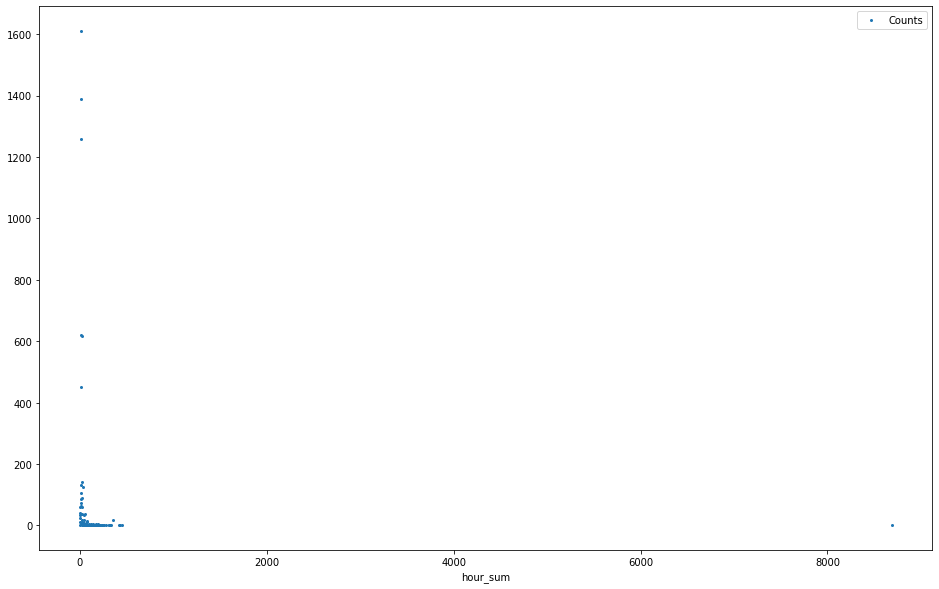

In [23]:
event_plot = event_hour_sum[['EventID','hour_sum']].groupby(['hour_sum']).count()
event_plot = event_plot.rename(columns={'EventID':'Counts'})
event_plot = event_plot.sort_values(by='Counts')
event_plot.plot(figsize=(16,10),marker='o',linestyle='',markersize=2)

In [24]:
event_plot = pd.DataFrame(event_plot)
event_plot = event_plot.reset_index()

In [25]:
event_plot_sel = event_plot[event_plot['hour_sum']<3000]
event_plot_sel

,hour_sum,Counts
0,1,1
1,136,1
2,126,1
3,122,1
4,107,1
...,...,...
102,17,617
103,13,619
104,16,1257
105,15,1388


In [26]:
event_plot_sel =event_plot_sel.sort_values('hour_sum')
event_plot_sel.to_csv('../output/permit_hour_sum_2021.csv')

In [28]:
event_plot_sel

,hour_sum,Counts
0,1,1
78,2,10
85,3,23
87,4,35
90,5,41
...,...,...
51,335,2
84,359,19
21,420,1
20,431,1


# Create permit characteristic table

In [92]:
data

,Unnamed: 0,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),...,Category,SubCategoryName,Country,ZipCode(s),OFT_Text,StartEnd,TimeList,hours,day,day_length
0,0,628327,Shooting Permit,2022-03-08 07:00:00,2022-03-08 19:00:00,02/28/2022 11:13:50 AM,"Mayor's Office of Film, Theatre & Broadcasting",SUTTON STREET between NORMAN AVENUE and NASSAU...,Brooklyn,1,...,Television,Pilot,United States of America,11222,['SUTTON STREET between NORMAN AVENUE and NASS...,"[2022-03-08 07:00:00, 2022-03-08 19:00:00]","DatetimeIndex(['2022-03-08 07:00:00', '2022-03...","[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]",[2022-03-08],1
1,1,629351,Shooting Permit,2022-03-08 07:00:00,2022-03-08 22:00:00,03/03/2022 02:51:17 PM,"Mayor's Office of Film, Theatre & Broadcasting",COVERT ST between WYCKOFF AVENUE and IRVING AV...,Queens,5,...,Television,Episodic series,United States of America,"11237, 11385",['COVERT ST between WYCKOFF AVENUE and IRVING ...,"[2022-03-08 07:00:00, 2022-03-08 22:00:00]","DatetimeIndex(['2022-03-08 07:00:00', '2022-03...","[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, ...",[2022-03-08],1
2,2,629319,Shooting Permit,2022-03-08 07:00:00,2022-03-08 21:00:00,03/03/2022 01:49:15 PM,"Mayor's Office of Film, Theatre & Broadcasting",WHITE STREET between SEIGEL STREET and MOORE S...,Brooklyn,1,...,Television,Cable-episodic,United States of America,11206,['WHITE STREET between SEIGEL STREET and MOORE...,"[2022-03-08 07:00:00, 2022-03-08 21:00:00]","DatetimeIndex(['2022-03-08 07:00:00', '2022-03...","[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, ...",[2022-03-08],1
6,6,629309,Shooting Permit,2022-03-08 07:00:00,2022-03-08 20:00:00,03/03/2022 01:30:28 PM,"Mayor's Office of Film, Theatre & Broadcasting",BARCLAY STREET between BROADWAY and CHURCH STR...,Manhattan,1,...,Television,Episodic series,United States of America,"10007, 10013, 10282",['BARCLAY STREET between BROADWAY and CHURCH S...,"[2022-03-08 07:00:00, 2022-03-08 20:00:00]","DatetimeIndex(['2022-03-08 07:00:00', '2022-03...","[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]",[2022-03-08],1
18,18,629504,Shooting Permit,2022-03-08 16:00:00,2022-03-09 06:00:00,03/04/2022 08:44:43 AM,"Mayor's Office of Film, Theatre & Broadcasting",WEST 13 STREET between 10 AVENUE and WASHING...,Manhattan,2,...,Film,Feature,United States of America,10014,['WEST 13 STREET between 10 AVENUE and WASHI...,"[2022-03-08 16:00:00, 2022-03-09 06:00:00]","DatetimeIndex(['2022-03-08 16:00:00', '2022-03...","[16, 17, 18, 19, 20, 21, 22, 23, 0, 1, 2, 3, 4...","[2022-03-08, 2022-03-09]",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37503,37503,628492,Shooting Permit,2022-03-02 06:30:00,2022-03-02 20:00:00,02/28/2022 04:05:55 PM,"Mayor's Office of Film, Theatre & Broadcasting",WEBSTER AVENUE between EAST 235 STREET and EA...,Bronx,12,...,Television,Episodic series,United States of America,10470,['WEBSTER AVENUE between EAST 235 STREET and ...,"[2022-03-02 06:30:00, 2022-03-02 20:00:00]","DatetimeIndex(['2022-03-02 06:30:00', '2022-03...","[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]",[2022-03-02],1
37507,37507,624471,Shooting Permit,2022-02-14 06:00:00,2022-02-14 22:00:00,02/04/2022 11:11:04 AM,"Mayor's Office of Film, Theatre & Broadcasting",PROVOST STREET between PAIDGE AVENUE and HURON...,Brooklyn,1,...,Television,Cable-episodic,United States of America,11222,['PROVOST STREET between PAIDGE AVENUE and HUR...,"[2022-02-14 06:00:00, 2022-02-14 22:00:00]","DatetimeIndex(['2022-02-14 06:00:00', '2022-02...","[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 1...",[2022-02-14],1
37513,37513,629373,Theater Load in and Load Outs,2022-03-05 00:01:00,2022-03-06 06:00:00,03/03/2022 03:25:49 PM,"Mayor's Office of Film, Theatre & Broadcasting",EAST 11 STREET between 3 AVENUE and 4 AVENUE...,Manhattan,"11, 3",...,Theater,Theater,United States of America,"10003, 10029",['EAST 11 STREET between 3 AVENUE and 4 AVEN...,"[2022-03-05 00

In [121]:
gdf_film_lion = gpd.read_file('../output/film permit_city.shp')  
gdf_film_lion

,EventID,EventType,StartDateT,EndDateTim,EnteredOn,EventAgenc,ParkingHel,Borough,CommunityB,PolicePrec,Category,SubCategor,Country,ZipCode(s),SegmentID,OBJECTID,Join_ID,geometry
0,628327,Shooting Permit,03/08/2022 07:00:00 AM,03/08/2022 07:00:00 PM,02/28/2022 11:13:50 AM,"Mayor's Office of Film, Theatre & Broadcasting",SUTTON STREET between NORMAN AVENUE and NASSAU...,Brooklyn,1,94,Television,Pilot,United States of America,11222,0065898,39195.0,3762801000000,"LINESTRING (1000675.780 203773.602, 1000590.62..."
1,628327,Shooting Permit,03/08/2022 07:00:00 AM,03/08/2022 07:00:00 PM,02/28/2022 11:13:50 AM,"Mayor's Office of Film, Theatre & Broadcasting",SUTTON STREET between NORMAN AVENUE and NASSAU...,Brooklyn,1,94,Television,Pilot,United States of America,11222,0065898,39196.0,36363001000000V,"LINESTRING (1000675.780 203773.602, 1000590.62..."
2,629351,Shooting Permit,03/08/2022 07:00:00 AM,03/08/2022 10:00:00 PM,03/03/2022 02:51:17 PM,"Mayor's Office of Film, Theatre & Broadcasting",COVERT ST between WYCKOFF AVENUE and IRVING AV...,Queens,5,104,Television,Episodic series,United States of America,"11237, 11385",0048509,161985.0,4175201000000,"LINESTRING (1010582.250 192025.794, 1010809.74..."
3,629319,Shooting Permit,03/08/2022 07:00:00 AM,03/08/2022 09:00:00 PM,03/03/2022 01:49:15 PM,"Mayor's Office of Film, Theatre & Broadcasting",WHITE STREET between SEIGEL STREET and MOORE S...,Brooklyn,1,90,Television,Cable-episodic,United States of America,11206,0044431,58576.0,3856401000000,"LINESTRING (1002265.974 195997.473, 1002202.52..."
4,629319,Shooting Permit,03/08/2022 07:00:00 AM,03/08/2022 09:00:00 PM,03/03/2022 01:49:15 PM,"Mayor's Office of Film, Theatre & Broadcasting",WHITE STREET between SEIGEL STREET and MOORE S...,Brooklyn,1,90,Television,Cable-episodic,United States of America,11206,0044457,46783.0,3700401000000,"LINESTRING (1002202.526 196249.592, 1002715.21..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44832,623949,Shooting Permit,02/04/2022 08:00:00 AM,02/04/2022 09:30:00 PM,02/01/2022 01:32:18 PM,"Mayor's Office of Film, Theatre & Broadcasting",PEARL STREET between PECK SLIP and BEEKMAN STR...,Manhattan,1,1,Television,Episodic series,United States of America,"10004, 10005, 10038",0023296,102850.0,1367501000000,"LINESTRING (982183.843 196510.021, 982273.246 ..."
44833,623949,Shooting Permit,02/04/2022 08:00:00 AM,02/04/2022 09:30:00 PM,02/01/2022 01:32:18 PM,"Mayor's Office of Film, Theatre & Broadcasting",PEARL STREET between PECK SLIP and BEEKMAN STR...,Manhattan,1,1,Television,Episodic series,United States of America,"10004, 10005, 10038",0023304,92090.0,1367501000000,"LINESTRING (982273.246 196628.042, 982369.951 ..."
44834,623949,Shooting Permit,02/04/2022 08:00:00 AM,02/04/2022 09:30:00 PM,02/01/2022 01:32:18 PM,"Mayor's Office of Film, Theatre & Broadcasting",PEARL STREET between PECK SLIP and BEEKMAN STR...,Manhattan,1,1,Television,Episodic series,United States of America,"10004, 10005, 10038",0023303,NaN,None,None
44835,623949,Shooting Permit,02/04/2022 08:00:00 AM,02/04/2022 09:30:00 PM,02/01/2022 01:32:18 PM,"Mayor's Office of Film, Theatre & Broadcasting",PEARL STREET between PECK SLIP and BEEKMAN STR...,Manhattan,1,1,Television,Episodic series,United States of America,"10004, 10005, 10038",0023182,90326.0,1276001000000,"LINESTRING (981806.626 196495.926, 981736.245 ..."


In [123]:
data_chara = gdf_film_lion[['EventID','EventType','Borough','Category','SubCategor','geometry']]
data_chara

,EventID,EventType,Borough,Category,SubCategor,geometry
0,628327,Shooting Permit,Brooklyn,Television,Pilot,"LINESTRING (1000675.780 203773.602, 1000590.62..."
1,628327,Shooting Permit,Brooklyn,Television,Pilot,"LINESTRING (1000675.780 203773.602, 1000590.62..."
2,629351,Shooting Permit,Queens,Television,Episodic series,"LINESTRING (1010582.250 192025.794, 1010809.74..."
3,629319,Shooting Permit,Brooklyn,Television,Cable-episodic,"LINESTRING (1002265.974 195997.473, 1002202.52..."
4,629319,Shooting Permit,Brooklyn,Television,Cable-episodic,"LINESTRING (1002202.526 196249.592, 1002715.21..."
...,...,...,...,...,...,...
44832,623949,Shooting Permit,Manhattan,Television,Episodic series,"LINESTRING (982183.843 196510.021, 982273.246 ..."
44833,623949,Shooting Permit,Manhattan,Television,Episodic series,"LINESTRING (982273.246 196628.042, 982369.951 ..."
44834,623949,Shooting Permit,Manhattan,Television,Episodic series,None
44835,623949,Shooting Permit,Manhattan,Television,Episodic series,"LINESTRING (981806.626 196495.926, 981736.245 ..."


In [124]:
event_hour_sum

,StartDateTime,EventID,hour_sum,day
460,2021-02-09 15:00:00,560553,1,0.041667
1461,2021-04-08 10:00:00,567625,2,0.083333
1606,2021-04-16 15:30:00,569707,2,0.083333
6271,2022-01-08 08:00:00,619096,2,0.083333
5199,2021-11-05 11:00:00,610243,2,0.083333
...,...,...,...,...
2406,2021-06-07 00:01:00,566089,359,14.958333
3973,2021-09-14 07:00:00,601797,420,17.500000
4505,2021-10-08 00:01:00,603731,431,17.958333
3677,2021-08-28 06:00:00,599792,449,18.708333


In [125]:
event_hour_sum_10hrmx = event_hour_sum[event_hour_sum['hour_sum']<=10]

In [126]:
event_hour_sum_10hrmx = event_hour_sum_10hrmx.merge(data_chara, on='EventID',how='left')

In [129]:
event_hour_sum_10hrmx

,StartDateTime,EventID,hour_sum,day,EventType,Borough,Category,SubCategor,geometry
0,2021-02-09 15:00:00,560553,1,0.041667,Shooting Permit,Brooklyn,Television,Episodic series,"LINESTRING (997364.386 204181.698, 997603.497 ..."
1,2021-02-09 15:00:00,560553,1,0.041667,Shooting Permit,Brooklyn,Television,Episodic series,"LINESTRING (997603.497 204285.848, 997837.187 ..."
2,2021-02-09 15:00:00,560553,1,0.041667,Shooting Permit,Brooklyn,Television,Episodic series,"LINESTRING (997603.497 204285.848, 997837.187 ..."
3,2021-02-09 15:00:00,560553,1,0.041667,Shooting Permit,Brooklyn,Television,Episodic series,"LINESTRING (997603.497 204285.848, 997837.187 ..."
4,2021-02-09 15:00:00,560553,1,0.041667,Shooting Permit,Brooklyn,Television,Episodic series,"LINESTRING (997627.476 203576.043, 997364.386 ..."
...,...,...,...,...,...,...,...,...,...
2181,2021-10-10 06:00:00,605416,10,0.416667,Shooting Permit,Manhattan,WEB,Not Applicable,"LINESTRING (984997.567 201345.611, 985226.258 ..."
2182,2021-10-10 06:00:00,605416,10,0.416667,Shooting Permit,Manhattan,WEB,Not Applicable,"LINESTRING (985226.258 201245.201, 985442.307 ..."
2183,2021-10-10 06:00:00,605416,10,0.416667,Shooting Permit,Manhattan,WEB,Not Applicable,"LINESTRING (985051.616 200815.793, 985103.079 ..."
2184,2021-11-14 11:00:00,610937,10,0.416667,Shooting Permit,Manhattan,Television,Variety,"LINESTRING (981729.464 203773.102, 981764.352 ..."


In [135]:
geo_10hrmx = gpd.GeoDataFrame(event_hour_sum_10hrmx, geometry='geometry')

In [143]:
geo_10hrmx[pd.isna(geo_10hrmx['geometry'])]

,StartDateTime,EventID,hour_sum,day,EventType,Borough,Category,SubCategor,geometry
26,2021-02-09 15:00:00,560553,1,0.041667,Shooting Permit,Brooklyn,Television,Episodic series,None
46,2021-04-16 15:30:00,569707,2,0.083333,Shooting Permit,Manhattan,Television,Episodic series,None
73,2021-04-02 16:30:00,567399,3,0.125000,DCAS Prep/Shoot/Wrap Permit,Bronx,Television,Episodic series,None
110,2021-12-09 08:00:00,614745,3,0.125000,Shooting Permit,Brooklyn,Television,Episodic series,None
122,2021-10-18 15:00:00,607017,3,0.125000,Shooting Permit,Manhattan,Television,Episodic series,None
...,...,...,...,...,...,...,...,...,...
2011,2021-10-02 10:00:00,604682,10,0.416667,Shooting Permit,Manhattan,Television,Episodic series,None
2121,2021-07-25 20:00:00,593085,10,0.416667,Shooting Permit,Brooklyn,Film,Feature,None
2123,2021-08-19 16:00:00,597159,10,0.416667,Shooting Permit,Brooklyn,Music Video,Signed Artist,None
2139,2021-11-15 06:30:00,611052,10,0.416667,Shooting Permit,Manhattan,Television,Episodic series,None


In [151]:
geo_10hrmx[pd.notna(geo_10hrmx['geometry'])][
    [col for col in list(geo_10hrmx) if col not in ('StartDateTime')]
].explore(
    tiles="CartoDB positron",
    style_kwds={'opacity':0.06})

In [111]:
df_group_10hrmx = event_hour_sum_10hrmx[['hour_sum','day','EventType','Category','SubCategoryName','EventID']].groupby(['hour_sum','day','EventType','Category','SubCategoryName']).count()
df_group_10hrmx = df_group_10hrmx.rename(columns={'EventID':'Counts'})
df_group_10hrmx = df_group_10hrmx.reset_index()
df_group_10hrmx

,hour_sum,day,EventType,Category,SubCategoryName,Counts
0,1,0.041667,Shooting Permit,Television,Episodic series,1
1,2,0.083333,Shooting Permit,Commercial,Commercial,1
2,2,0.083333,Shooting Permit,Film,Short,1
3,2,0.083333,Shooting Permit,Television,Cable-episodic,2
4,2,0.083333,Shooting Permit,Television,Episodic series,4
...,...,...,...,...,...,...
127,10,0.416667,Shooting Permit,Television,Talk Show,3
128,10,0.416667,Shooting Permit,Television,Variety,4
129,10,0.416667,Shooting Permit,Theater,Theater,4
130,10,0.416667,Shooting Permit,WEB,Not Applicable,3


In [153]:
df_group_10hrmx = df_group_10hrmx.sort_values(by='Counts')
df_group_10hrmx.tail(10)

,hour_sum,day,EventType,Category,SubCategoryName,Counts
94,9,0.375000,Shooting Permit,Commercial,Commercial,11
52,6,0.250000,Shooting Permit,Television,News,13
11,3,0.125000,Shooting Permit,Television,Episodic series,13
37,5,0.208333,Shooting Permit,Television,Episodic series,14
121,10,0.416667,Shooting Permit,Still Photography,Not Applicable,15
50,6,0.250000,Shooting Permit,Television,Episodic series,17
66,7,0.291667,Shooting Permit,Television,News,24
104,9,0.375000,Shooting Permit,Television,Episodic series,27
84,8,0.333333,Shooting Permit,Television,Episodic series,27
125,10,0.416667,Shooting Permit,Television,Episodic series,33


In [105]:
df_group_10hrmx


# Create Day count and Hour count by segment

In [ ]:
# f = lambda x: list(z for y in x for z in y)    
# data_sum = data.groupby(['SegmentID'])['hours'].agg(f).reset_index()
# data_sum

In [ ]:
# data_sum['hour_sum'] = data_sum['hours'].apply(lambda x: len(x))  
# data_sum = data_sum.astype({'SegmentID': 'int'})
# data_sum = pd.DataFrame(data_sum)
# data_sum = data_sum.sort_values(by='SegmentID')
# data_sum[['SegmentID','hour_sum']].to_csv('../data/segment_hour_count.csv')  

In [ ]:
# data_sum.sort_values(by='hour_sum')

In [ ]:
# lion = gpd.read_file("../vector/lion_line" )

In [ ]:
# lion_sel = lion[['OBJECTID','SegmentID','Join_ID','geometry']]
# lion_sel = lion_sel.astype({'SegmentID': 'int'})
# lion_sel = lion_sel.sort_values(by='SegmentID')
# lion_sel

In [ ]:
# df_film__segment_hour = data_sum.merge(lion_sel,how='left',on='SegmentID')
# df_film__segment_hour

In [ ]:
# df_film__segment_hour.drop_duplicates(subset=['SegmentID'])

In [ ]:
# df_film__segment_hour_drop = df_film__segment_hour.drop(columns=['hours'])
# df_film__segment_hour_drop = gpd.GeoDataFrame(df_film__segment_hour_drop, crs="EPSG:4326").set_geometry('geometry')

In [ ]:
# df_film__segment_hour_drop.to_file('../output/permit_segment_hour.shp')  